In [40]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

#Loading the data from the file

df = pd.read_csv('C:\\Users\\Saira\\Desktop\ML\\Individual_Assignment-Project\\owid-covid-data.csv')


df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,23/1/2020,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,24/1/2020,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,25/1/2020,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,26/1/2020,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,27/1/2020,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60475,ZWE,Africa,Zimbabwe,29/11/2020,9822.0,0.0,86.000,275.0,0.0,1.000,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
60476,ZWE,Africa,Zimbabwe,30/11/2020,9950.0,128.0,91.714,276.0,1.0,0.429,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
60477,ZWE,Africa,Zimbabwe,1/12/2020,10129.0,179.0,104.429,277.0,1.0,0.429,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
60478,ZWE,Africa,Zimbabwe,2/12/2020,10129.0,0.0,88.714,277.0,0.0,0.429,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535


In [41]:
df.describe
# It has 50 columns and 60480 rows- we would filter for the required columns only
# get columns 'iso_code','location','date','total_cases','new_cases','total_tests','new_tests'
# There are 60480 rows x 50 columns


<bound method NDFrame.describe of       iso_code continent     location        date  total_cases  new_cases  \
0          AFG      Asia  Afghanistan   23/1/2020          NaN        0.0   
1          AFG      Asia  Afghanistan   24/1/2020          NaN        0.0   
2          AFG      Asia  Afghanistan   25/1/2020          NaN        0.0   
3          AFG      Asia  Afghanistan   26/1/2020          NaN        0.0   
4          AFG      Asia  Afghanistan   27/1/2020          NaN        0.0   
...        ...       ...          ...         ...          ...        ...   
60475      ZWE    Africa     Zimbabwe  29/11/2020       9822.0        0.0   
60476      ZWE    Africa     Zimbabwe  30/11/2020       9950.0      128.0   
60477      ZWE    Africa     Zimbabwe   1/12/2020      10129.0      179.0   
60478      ZWE    Africa     Zimbabwe   2/12/2020      10129.0        0.0   
60479      ZWE    Africa     Zimbabwe   3/12/2020      10424.0      295.0   

       new_cases_smoothed  total_deaths  

In [42]:
#extracting the required columns only
df=df[['iso_code','location','date','total_cases','new_cases','total_tests','new_tests']]
df
#60480 rows × 7 columns
#Filtered the columns required

,iso_code,location,date,total_cases,new_cases,total_tests,new_tests
0,AFG,Afghanistan,23/1/2020,NaN,0.0,NaN,NaN
1,AFG,Afghanistan,24/1/2020,NaN,0.0,NaN,NaN
2,AFG,Afghanistan,25/1/2020,NaN,0.0,NaN,NaN
3,AFG,Afghanistan,26/1/2020,NaN,0.0,NaN,NaN
4,AFG,Afghanistan,27/1/2020,NaN,0.0,NaN,NaN
...,...,...,...,...,...,...,...
60475,ZWE,Zimbabwe,29/11/2020,9822.0,0.0,168212.0,965.0
60476,ZWE,Zimbabwe,30/11/2020,9950.0,128.0,169009.0,797.0
60477,ZWE,Zimbabwe,1/12/2020,10129.0,179.0,170038.0,1029.0
60478,ZWE,Zimbabwe,2/12/2020,10129.0,0.0,171900.0,1862.0


In [43]:
#Checking the dattypes of the columns 
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60480 entries, 0 to 60479
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   iso_code     60164 non-null  object 
 1   location     60478 non-null  object 
 2   date         60480 non-null  object 
 3   total_cases  51743 non-null  float64
 4   new_cases    60356 non-null  float64
 5   total_tests  24032 non-null  float64
 6   new_tests    23861 non-null  float64
dtypes: float64(4), object(3)
memory usage: 3.2+ MB


Count of Null values is 82246 and Not null values is 341114


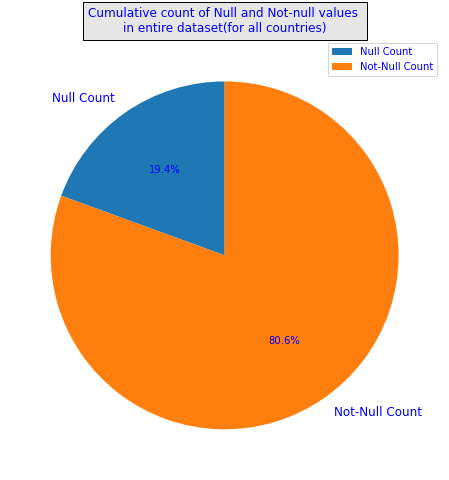

In [44]:
#Check for null and not null values in the dataset

print('Count of Null values is {} and Not null values is {}'.format(df.isnull().sum().sum(),df.notnull().sum().sum()))

#Plotting Null and Not null values
import matplotlib.pyplot as plt
counts=[df.isnull().sum().sum(),df.notnull().sum().sum()]
labels=['Null Count','Not-Null Count']
#colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
#patches, texts = plt.pie(counts, colors=colors, startangle=90)
patches, texts, junk  = plt.pie(counts, autopct='%1.1f%%',labels=labels,startangle=90)
plt.legend(patches, labels, loc="upper right")
#There are a few null values which need to be cleaned up.
plt.title("Cumulative count of Null and Not-null values \n" + "in entire dataset(for all countries)", bbox={'facecolor':'0.9', 'pad':5})
plt.show()


### Data Cleanup for location = Malaysia

In [45]:
#'location' column has  null, and missing country name
df[df['location'].isnull()==True]
# 2 rows have Location as Null 

,iso_code,location,date,total_cases,new_cases,total_tests,new_tests
32635,MYS,NaN,7/2/2020,12.0,0.0,0.0,0.0
32636,MYS,NaN,8/2/2020,16.0,4.0,0.0,0.0


In [46]:
#'iso_code' column has  null, and missing country name

df[df['iso_code'].isnull()==True]


,iso_code,location,date,total_cases,new_cases,total_tests,new_tests
24403,NaN,International,23/1/2020,NaN,0.0,NaN,NaN
24404,NaN,International,24/1/2020,NaN,0.0,NaN,NaN
24405,NaN,International,25/1/2020,NaN,0.0,NaN,NaN
24406,NaN,International,26/1/2020,NaN,0.0,NaN,NaN
24407,NaN,International,27/1/2020,NaN,0.0,NaN,NaN
...,...,...,...,...,...,...,...
24714,NaN,International,29/11/2020,721.0,0.0,NaN,NaN
24715,NaN,International,30/11/2020,721.0,0.0,NaN,NaN
24716,NaN,International,1/12/2020,721.0,0.0,NaN,NaN
24717,NaN,International,2/12/2020,721.0,0.0,NaN,NaN


In [47]:
#If iso_code and location is null then delete the record
for index, row in df.iterrows(): 
    if df.loc[index, 'location'] is None :#'location' column has  null, and missing values
        if df.loc[index, 'iso_code'] is None :#'iso_code' column has  null, and missing values
            df.drop(index)#Delete the data record
print('Dropped records where location and iso_code is null')

Dropped records where location and iso_code is null


In [48]:
#Correct invalid iso_code values for location Malaysia
for index, row in df.iterrows(): 
    if df.loc[index, 'location'] =='Malaysia' :#'location' is Malaysia
        if df.loc[index, 'iso_code']!='MYS' :#'iso_code' not equal to MYS
            df.loc[index, 'iso_code']='MYS'
print('Replaced invalid iso_code values for location Malaysia')

Replaced invalid iso_code values for location Malaysia


In [49]:
#Correct invalid location values for iso_code MYS
for index, row in df.iterrows(): 
    if df.loc[index, 'iso_code'] =='MYS' :#'iso_code' is MYS
        if df.loc[index, 'location']!='Malaysia' :#'location' not equal to Malaysia
            df.loc[index, 'location']='Malaysia'
print('Replaced invalid location values for iso_code MYS ')

Replaced invalid location values for iso_code MYS 


In [50]:
#We filter records for location = Malaysia
df=df[df['iso_code']=='MYS']

df


,iso_code,location,date,total_cases,new_cases,total_tests,new_tests
32620,MYS,Malaysia,23/1/2020,1.0,1.0,0.0,0.0
32621,MYS,Malaysia,24/1/2020,2.0,1.0,0.0,0.0
32622,MYS,Malaysia,25/1/2020,3.0,3.0,0.0,0.0
32623,MYS,Malaysia,26/1/2020,4.0,1.0,0.0,0.0
32624,MYS,Malaysia,27/1/2020,4.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
32931,MYS,Malaysia,29/11/2020,64485.0,1309.0,2650368.0,15370.0
32932,MYS,Malaysia,30/11/2020,65697.0,1212.0,2667756.0,17388.0
32933,MYS,Malaysia,1/12/2020,67169.0,1472.0,2686452.0,18696.0
32934,MYS,Malaysia,2/12/2020,68020.0,851.0,2707207.0,20755.0


For Malaysia total count of null values is 48 and not null values is 2164 


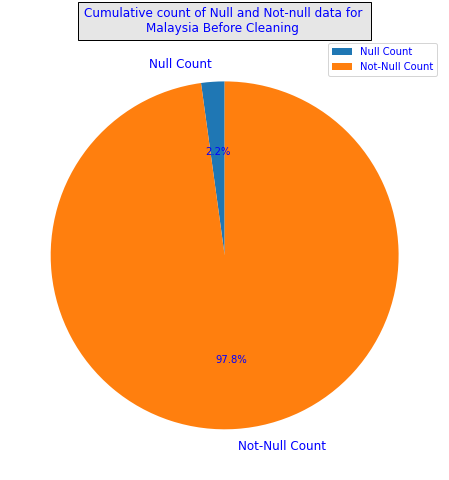

In [51]:
# Checking for NULL values in all columns for location = Malaysia
print('For Malaysia total count of null values is {} and not null values is {} '.format(df.isnull().sum().sum(),df.notnull().sum().sum()))

counts=[df.isnull().sum().sum(),df.notnull().sum().sum()]
labels=['Null Count','Not-Null Count']
#colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
#patches, texts = plt.pie(counts, colors=colors, startangle=90)
patches, texts, junk  = plt.pie(counts, autopct='%1.1f%%',labels=labels,startangle=90)
plt.legend(patches, labels, loc="upper right")
#There are a few null values whihc need to be cleaned up.
plt.title("Cumulative count of Null and Not-null data for \n" + "Malaysia Before Cleaning ", bbox={'facecolor':'0.9', 'pad':5})
plt.show()

In [52]:
#Check for datatype for each value in the columns in data 
if df.dtypes['new_tests']!= np.float64:
    print('Invalid data in columns new_tests')
else:
    print('Column new_tests datatype is fine')
    
if df.dtypes['total_cases']!= np.float64:
    print('Invalid data in columns total_cases')
else:
    print('Column total_cases datatype is fine')
    
if df.dtypes['new_cases']!= np.float64:
    print('Invalid data in columns new_cases')
else:
    print('Column new_cases datatype is fine')
    
if df.dtypes['total_tests']!= np.float64:
    print('Invalid data in columns total_tests')
else:
    print('Column total_tests datatype is fine')
    
if df.dtypes['iso_code']!= np.object:
    print('Invalid data in columns iso_code')
else:
    print('Column iso_code datatype is fine')
    
if df.dtypes['location']!= np.object:
    print('Invalid data in columns location')
else:
    print('Column location datatype is fine')
    
if df.dtypes['date']!= np.object:
    print('Invalid data in columns date')
else:
    print('Column date datatype is fine')

Column new_tests datatype is fine
Column total_cases datatype is fine
Column new_cases datatype is fine
Column total_tests datatype is fine
Column iso_code datatype is fine
Column location datatype is fine
Column date datatype is fine


Column new_cases has 1 null values . Kindly handle it


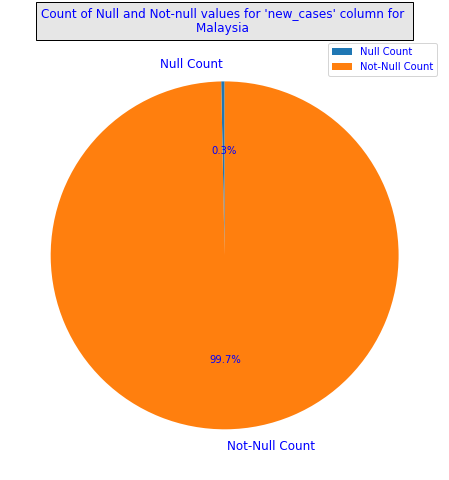

In [53]:
# Checking if 'new_cases' column has`  null, and missing value
df_temp=df[df['new_cases'].isnull()==True]

if df['new_cases'].isnull().sum()==0:
    print('Column new_cases has no null values')
else:
    print('Column new_cases has {} null values . Kindly handle it'.format(df['new_cases'].isnull().sum()))

df_temp

#Graphical representation of checking 'if 'new_cases' column has`  null, and missing value

counts=[df['new_cases'].isnull().sum().sum(),df['new_cases'].notnull().sum().sum()]
labels=['Null Count','Not-Null Count']
#colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
#patches, texts = plt.pie(counts, colors=colors, startangle=90)
patches, texts, junk  = plt.pie(counts, autopct='%1.1f%%',labels=labels,startangle=90)
plt.legend(patches, labels, loc="upper right")
#There are a few null values whihc need to be cleaned up.
plt.title("Count of Null and Not-null values for 'new_cases' column for \n" + "Malaysia ", bbox={'facecolor':'0.9', 'pad':5})
plt.show()


In [54]:
#Check and clean data for column 'new_cases' with null and missing value
import math

for index, row in df.iterrows(): 
    if np.isnan(df.loc[index, 'new_cases']):#'new_cases' column has  null, and missing values
        if np.isnan(df.loc[index, 'total_cases']):#'total_cases' column has  null, and missing values
            df.drop(index)#Delete the data record
        else:
            df.loc[index, 'new_cases'] =  df.loc[index , 'total_cases']-df.loc[(index - 1), 'total_cases']
            #Arrange df as per 'total_cases' column in ascending order new_cases' = current 'total_cases' value - previous 'total_cases' value


Column new_cases has no null values


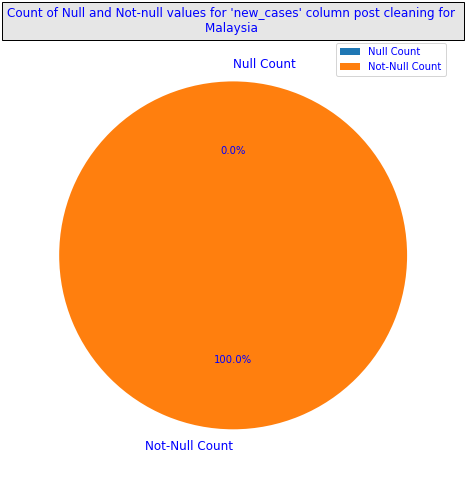

In [55]:
#Check and confirm if column 'new_cases' has no null values
if df['new_cases'].isnull().sum()==0:
    print('Column new_cases has no null values')
else:
    print('Column new_cases has {} null values . Kindly handle it'.format(df['new_cases'].isnull().sum()))

#Graphical representation of checking 'if 'new_cases' column has`  null, and missing value   post cleaning 

counts=[df['new_cases'].isnull().sum().sum(),df['new_cases'].notnull().sum().sum()]
labels=['Null Count','Not-Null Count']
#colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
#patches, texts = plt.pie(counts, colors=colors, startangle=90)
patches, texts, junk  = plt.pie(counts, autopct='%1.1f%%',labels=labels,startangle=90)
plt.legend(patches, labels, loc="upper right")
#There are a few null values which need to be cleaned up.
plt.title("Count of Null and Not-null values for 'new_cases' column post cleaning for \n" + "Malaysia ", bbox={'facecolor':'0.9', 'pad':5})
plt.show()

Column new_tests has 47 null values . Kindly handle it


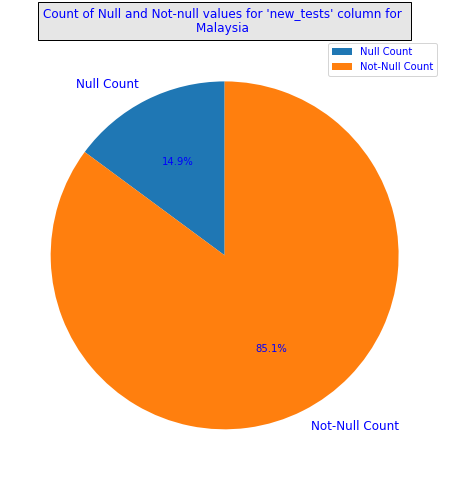

In [56]:
#Check if column 'new_tests' has  null values

df[df['new_tests'].isnull()==True]
if df['new_tests'].isnull().sum()==0:
    print('Column new_tests has no null values')
else:
    print('Column new_tests has {} null values . Kindly handle it'.format(df['new_tests'].isnull().sum()))

#Graphical representation of checking 'if 'new_tests' column has`  null, and missing value

counts=[df['new_tests'].isnull().sum().sum(),df['new_tests'].notnull().sum().sum()]
labels=['Null Count','Not-Null Count']
#colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
#patches, texts = plt.pie(counts, colors=colors, startangle=90)
patches, texts, junk  = plt.pie(counts, autopct='%1.1f%%',labels=labels,startangle=90)
plt.legend(patches, labels, loc="upper right")
#There are a few null values whihc need to be cleaned up.
plt.title("Count of Null and Not-null values for 'new_tests' column for \n" + "Malaysia ", bbox={'facecolor':'0.9', 'pad':5})
plt.show()


In [57]:
#Clean data for column 'new_tests' with null and missing value
for index, row in df.iterrows(): 
    if np.isnan(df.loc[index, 'new_tests']):#'new_tests' column has   null, and missing values
        if np.isnan(df.loc[index, 'total_tests']) or df.loc[index, 'total_tests']==0.0:#'total_tests' column has null, and missing values
            df.drop(index)#Delete the data record
        else:
            df.loc[index, 'new_tests'] =  df.loc[index , 'total_tests']-df.loc[(index - 1), 'total_tests']
# Arrange df as per 'total_tests' column in ascending order new_tests' = current 'total_tests' value - previous 'total_tests' value 

Column new_tests has no null values


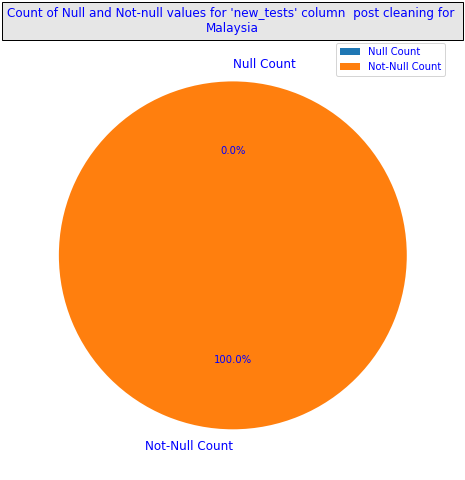

In [58]:
#Check if column new_tests has null values after cleaning

if df['new_tests'].isnull().sum()==0:
    print('Column new_tests has no null values')
else:
    print('Column new_tests has {} null values . Kindly handle it'.format(df['new_tests'].isnull().sum()))

#Graphical representation of checking 'if 'new_tests' column has`  null, and missing value

counts=[df['new_tests'].isnull().sum().sum(),df['new_tests'].notnull().sum().sum()]
labels=['Null Count','Not-Null Count']
#colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
#patches, texts = plt.pie(counts, colors=colors, startangle=90)
patches, texts, junk  = plt.pie(counts, autopct='%1.1f%%',labels=labels,startangle=90)
plt.legend(patches, labels, loc="upper right")
#There are a few null values whihc need to be cleaned up.
plt.title("Count of Null and Not-null values for 'new_tests' column  post cleaning for \n" + "Malaysia", bbox={'facecolor':'0.9', 'pad':5})
plt.show()

Dataset has no null values


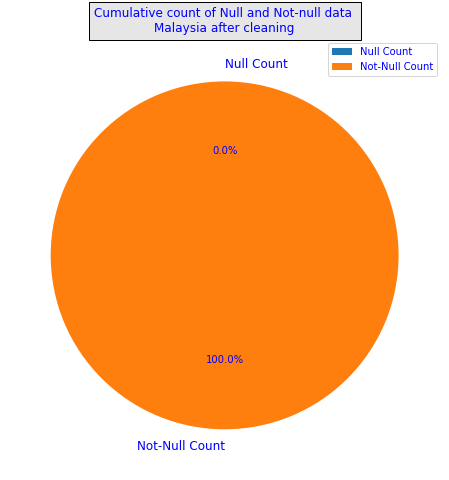

In [59]:
#Check if dataset has null values for any of required columns

if df.isnull().sum().sum()==0:
    print('Dataset has no null values')
else:
    print('Dataset have {} null values . Kindly handle it'.format(df.isnull().sum().sum()))

#Graphical representation of checking 'if dataset has`  null, and missing value
counts=[df.isnull().sum().sum(),df.notnull().sum().sum()]
labels=['Null Count','Not-Null Count']
#colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
#patches, texts = plt.pie(counts, colors=colors, startangle=90)
patches, texts, junk  = plt.pie(counts, autopct='%1.1f%%',labels=labels,startangle=90)
plt.legend(patches, labels, loc="upper right")
#There are a few null values whihc need to be cleaned up.
plt.title("Cumulative count of Null and Not-null data \n" + "Malaysia after cleaning", bbox={'facecolor':'0.9', 'pad':5})
plt.show()
#No Null records present

In [60]:
#Printing the final preprocessed data
df

,iso_code,location,date,total_cases,new_cases,total_tests,new_tests
32620,MYS,Malaysia,23/1/2020,1.0,1.0,0.0,0.0
32621,MYS,Malaysia,24/1/2020,2.0,1.0,0.0,0.0
32622,MYS,Malaysia,25/1/2020,3.0,3.0,0.0,0.0
32623,MYS,Malaysia,26/1/2020,4.0,1.0,0.0,0.0
32624,MYS,Malaysia,27/1/2020,4.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
32931,MYS,Malaysia,29/11/2020,64485.0,1309.0,2650368.0,15370.0
32932,MYS,Malaysia,30/11/2020,65697.0,1212.0,2667756.0,17388.0
32933,MYS,Malaysia,1/12/2020,67169.0,1472.0,2686452.0,18696.0
32934,MYS,Malaysia,2/12/2020,68020.0,851.0,2707207.0,20755.0


In [61]:
#Convert String data to date datatype for time series calcualtion
##converting 'date' column to type 'datetime' so that indexing can happen later

df['date'] = pd.to_datetime(df['date'],format="%d/%m/%Y")

### DATA Cleaning Complete since there are no null values in required columns - iso_code, location, date, total_cases, new_cases, total_tests, new_tests



# Start with Model Building

In [62]:
#Augmented Dickey–Fuller test (adf) is used in statistics and econometrics and it tests the null hypothesis
#that a unit root is present in a time series sample
#ADF: if the p-value is less than the critical value, the series is stationary
#create Method for ADF
from statsmodels.tsa.stattools import adfuller
def print_adf_result(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)



In [63]:
#Kwiatkowski–Phillips–Schmidt–Shin (KPSS) tests are used for testing a null hypothesis that an observable 
#time series is stationary around a deterministic trend (i.e. trend-stationary) against the alternative of a unit root
#KPSS: if the p-value is less than the critical value, the series is stationary

#define function for kpss test
from statsmodels.tsa.stattools import kpss
def print_kpss_result(timeseries):
    print ('Results of KPSS Test is as under:')
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
      kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)


In [64]:
df['date'].min(),df['date'].max()
#the date range of dta would e printed
#df

(Timestamp('2020-01-23 00:00:00'), Timestamp('2020-12-03 00:00:00'))

In [65]:
#Set standard for matplot parameters
import matplotlib as mpl

def set_plot_colour(COLOR):
    mpl.rcParams['text.color'] = COLOR
    mpl.rcParams['axes.labelcolor'] = COLOR
    mpl.rcParams['xtick.color'] = COLOR
    mpl.rcParams['ytick.color'] = COLOR
    

mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
#set colour
COLOR = 'blue'
set_plot_colour(COLOR)

### Objective 1:
Considering current trend of COVID-19 cases in Malaysia, I want to determine if Malaysia could achieve 14 days average of below 100 cases/day within the next 3 months(Cumulative count of new cases over 14 consecutive days should be less than 1400).


In [66]:
df_cases=df[['date','new_cases']]
#set index the data frame by ‘Date 
df_cases=df_cases.set_index('date')

In [67]:
#aggregate the data from daily to Weekly in order to carry out the analysis
cases_ts_weekly_avg = df_cases['new_cases'].resample('W').mean()
#W : weekly frequency
#M : month end frequency
#SM : semi-month end frequency (15th and end of month)
#Q : quarter end frequency
cases_ts_weekly_avg

date
2020-01-26       1.500000
2020-02-02       0.571429
2020-02-09       1.142857
2020-02-16       0.857143
2020-02-23       0.000000
2020-03-01       1.000000
2020-03-08      10.000000
2020-03-15      47.000000
2020-03-22     125.428571
2020-03-29     166.285714
2020-04-05     170.285714
2020-04-12     145.857143
2020-04-19     100.857143
2020-04-26      55.857143
2020-05-03      74.000000
2020-05-10      51.142857
2020-05-17      34.000000
2020-05-24      50.142857
2020-05-31      82.000000
2020-06-07      71.857143
2020-06-14      18.714286
2020-06-21      17.000000
2020-06-28       8.857143
2020-07-05       4.142857
2020-07-12       7.857143
2020-07-19       8.714286
2020-07-26      16.857143
2020-08-02      14.571429
2020-08-09      12.000000
2020-08-16      16.714286
2020-08-23       9.571429
2020-08-30       9.571429
2020-09-06       9.000000
2020-09-13      74.000000
2020-09-20      43.428571
2020-09-27     100.000000
2020-10-04     208.857143
2020-10-11     468.000000
2020-10

In [68]:
X = cases_ts_weekly_avg
train_size = int(len(X) * 0.7)
train, test = X[0:train_size], X[train_size:len(X)]
print('Observations: %d' % (len(X)))
print('Training Observations: %d' % (len(train)))
print('Testing Observations: %d' % (len(test)))

Observations: 46
Training Observations: 32
Testing Observations: 14


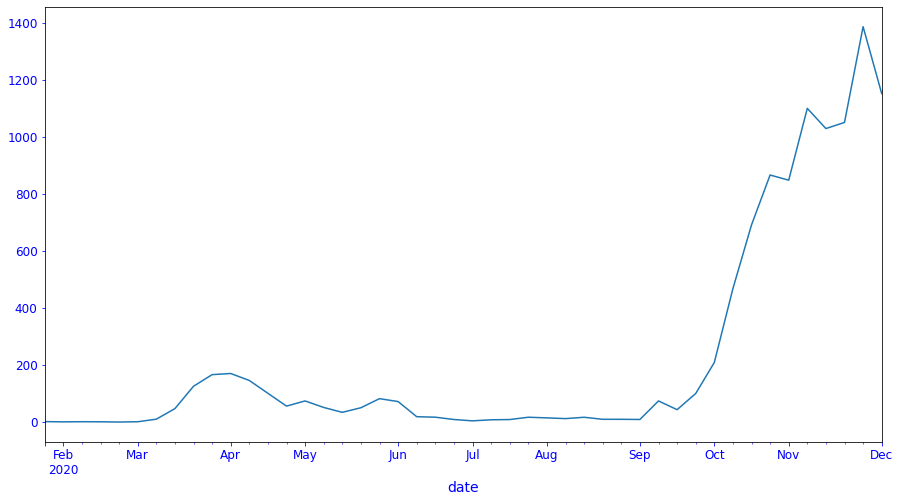

In [69]:
#Plotting the series
import matplotlib.pyplot as plt
#plt.style.use('fivethirtyeight')

cases_ts_weekly_avg.plot(figsize=(15, 8))
plt.show()

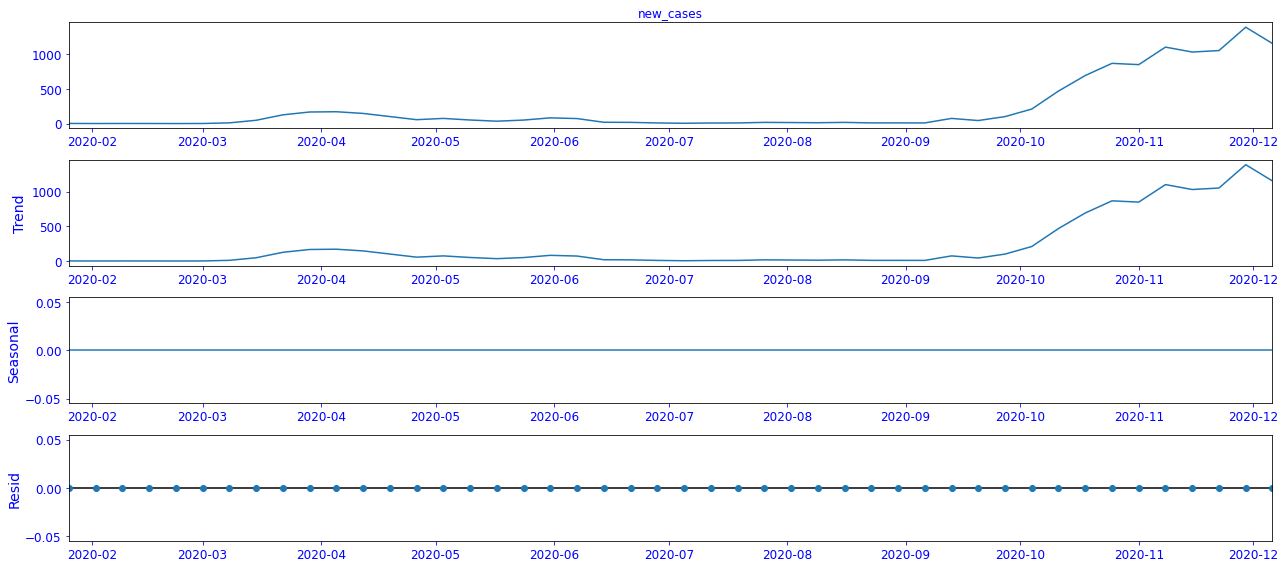

In [70]:
#decomposed time series to get components Trend, Seasonality &  Noise
from pylab import rcParams
import statsmodels.api as sm

rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(cases_ts_weekly_avg, model='additive', extrapolate_trend='freq', period=1)
fig = decomposition.plot()
plt.show()

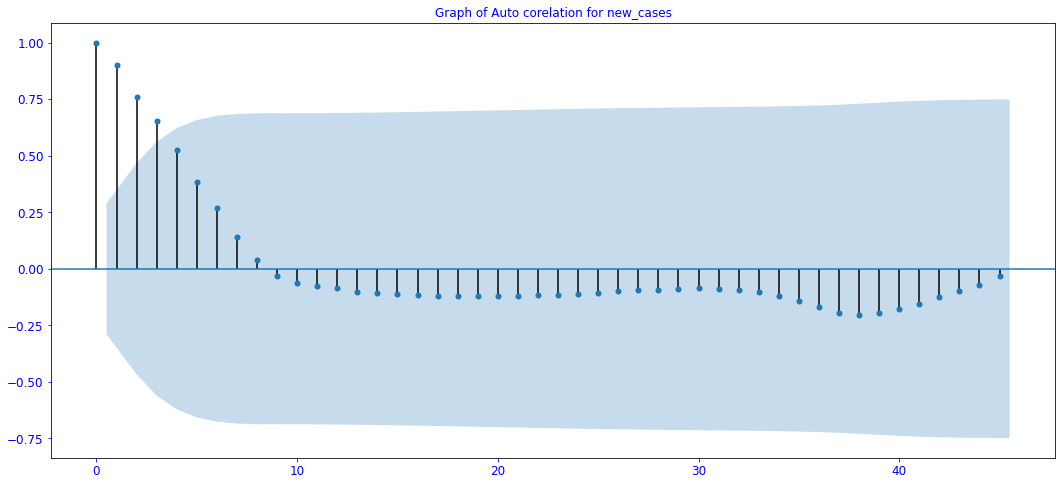

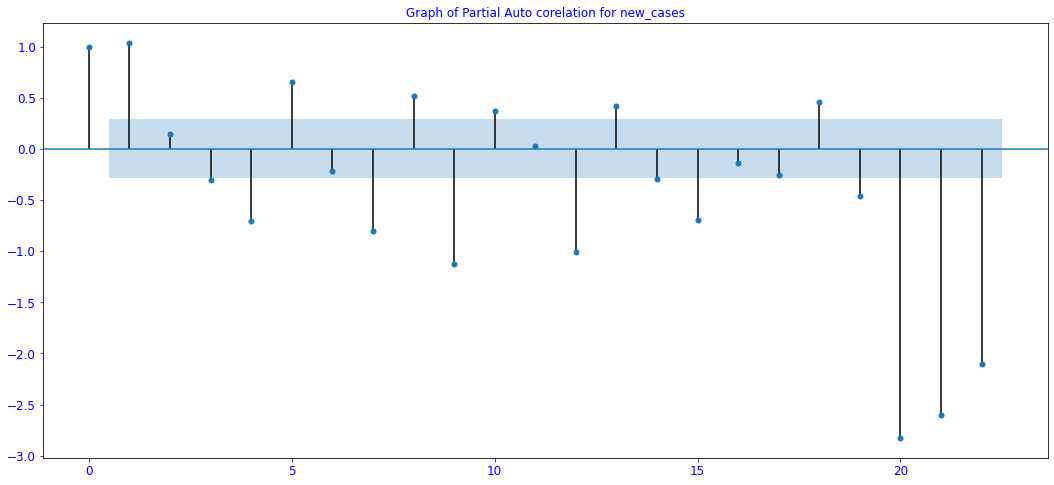

In [71]:
# Plotting the Auto Correlation Function(ACF) and Partial Auto Correlation Function(PACF) Plot of the Trend and Seasonally adjusted Time Series data
#to determine  p and seasonal P, q and seasonal Q
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#Plot the autocorrelation function

plot_acf(cases_ts_weekly_avg,use_vlines=True,title='Graph of Auto corelation for new_cases', lags=45)
mpl.pyplot.show()
#The trendwas initially decreasing in initial few weeks and then it started increasing . The change in trend results in change in corelation.
#ACF plot Spikes at lag =1 means a probable Autoregressive(AR)  order of 1 and seasonal AR order of 1

#Plots lags on the horizontal and the partial correlations on vertical axis for time-series data using method='ols'.
plot_pacf(cases_ts_weekly_avg,use_vlines=True,method='ols' ,title='Graph of Partial Auto corelation for new_cases', lags=22)
mpl.pyplot.show()
#PACF plot spikes at lag=1 and then spikes at lag=10 & lag=20, which means a probable Moving Average(MA) order of 1 or 2 and seasonal MA order of 1 

In [72]:
#apply adf test and kpss test on the series to check whether series is stationery
print(print_adf_result(cases_ts_weekly_avg))
print(print_kpss_result(cases_ts_weekly_avg))
#ADF: if the p-value is less than the critical value , the series is stationary
#P valie is 0.99 whihc is not less than critical value of 0.05 so statistically we can confirm that the series is not stationary.
#Hence, we would do first-order differencing for the trend and re-run the ADF test to check for stationarity.

Results of Dickey-Fuller Test:
Test Statistic                  0.709449
p-value                         0.990025
#Lags Used                      4.000000
Number of Observations Used    41.000000
Critical Value (1%)            -3.600983
Critical Value (5%)            -2.935135
Critical Value (10%)           -2.605963
dtype: float64
None
Results of KPSS Test is as under:
Test Statistic            0.371216
p-value                   0.089562
Lags Used                10.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
None


In [73]:
#Doing First Order differencing
ts_cases_adj = cases_ts_weekly_avg - cases_ts_weekly_avg.shift(1)
#ts_cases_adj =cases_ts_weekly_avg
ts_cases_adj = ts_cases_adj.dropna()
#ts_cases_adj.plot()
print(print_adf_result(ts_cases_adj))
print(print_kpss_result(ts_cases_adj))
#For first oder differencing p =0.15 NOT less than 0.05 so going for second order differencing

Results of Dickey-Fuller Test:
Test Statistic                 -2.363413
p-value                         0.152330
#Lags Used                      3.000000
Number of Observations Used    41.000000
Critical Value (1%)            -3.600983
Critical Value (5%)            -2.935135
Critical Value (10%)           -2.605963
dtype: float64
None
Results of KPSS Test is as under:
Test Statistic            0.283138
p-value                   0.100000
Lags Used                10.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
None


In [74]:
#Doing Second Order differencing
ts_cases_adj = cases_ts_weekly_avg - cases_ts_weekly_avg.shift(2)
#ts_cases_adj =cases_ts_weekly_avg
ts_cases_adj = ts_cases_adj.dropna()
#ts_cases_adj.plot()
print(print_adf_result(ts_cases_adj))
print(print_kpss_result(ts_cases_adj))
#For Second oder differencing p =0.90 NOT less than 0.05 so going for Third order differencing

Results of Dickey-Fuller Test:
Test Statistic                 -0.447880
p-value                         0.901792
#Lags Used                      6.000000
Number of Observations Used    37.000000
Critical Value (1%)            -3.620918
Critical Value (5%)            -2.943539
Critical Value (10%)           -2.610400
dtype: float64
None
Results of KPSS Test is as under:
Test Statistic            0.33223
p-value                   0.10000
Lags Used                10.00000
Critical Value (10%)      0.34700
Critical Value (5%)       0.46300
Critical Value (2.5%)     0.57400
Critical Value (1%)       0.73900
dtype: float64
None


In [75]:
#Doing Third Order differencing
ts_cases_adj = cases_ts_weekly_avg - cases_ts_weekly_avg.shift(3)
#ts_cases_adj =cases_ts_weekly_avg
ts_cases_adj = ts_cases_adj.dropna()
#ts_cases_adj.plot()
print(print_adf_result(ts_cases_adj))
print(print_kpss_result(ts_cases_adj))
#For Second oder differencing p =0.41 NOT less than 0.05 so going for Fourth order differencing

Results of Dickey-Fuller Test:
Test Statistic                 -1.741176
p-value                         0.410032
#Lags Used                      0.000000
Number of Observations Used    42.000000
Critical Value (1%)            -3.596636
Critical Value (5%)            -2.933297
Critical Value (10%)           -2.604991
dtype: float64
None
Results of KPSS Test is as under:
Test Statistic            0.322266
p-value                   0.100000
Lags Used                10.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
None


In [76]:
#Doing fourth Order differencing
ts_cases_adj = cases_ts_weekly_avg - cases_ts_weekly_avg.shift(4)
#ts_cases_adj =cases_ts_weekly_avg
ts_cases_adj = ts_cases_adj.dropna()
#ts_cases_adj.plot()
print(print_adf_result(ts_cases_adj))
print(print_kpss_result(ts_cases_adj))
#For Second oder differencing p =0.73 NOT less than 0.05 so going for Fifth order differencing

Results of Dickey-Fuller Test:
Test Statistic                 -1.053945
p-value                         0.733085
#Lags Used                      5.000000
Number of Observations Used    36.000000
Critical Value (1%)            -3.626652
Critical Value (5%)            -2.945951
Critical Value (10%)           -2.611671
dtype: float64
None
Results of KPSS Test is as under:
Test Statistic            0.320102
p-value                   0.100000
Lags Used                10.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
None


In [77]:
#Doing Fifth Order differencing
ts_cases_adj = cases_ts_weekly_avg - cases_ts_weekly_avg.shift(5)
#ts_cases_adj =cases_ts_weekly_avg
ts_cases_adj = ts_cases_adj.dropna()
#ts_cases_adj.plot()
print(print_adf_result(ts_cases_adj))
print(print_kpss_result(ts_cases_adj))
#For Second oder differencing p =0.65 NOT less than 0.05 so going for Sixth order differencing

Results of Dickey-Fuller Test:
Test Statistic                 -1.241076
p-value                         0.655681
#Lags Used                      0.000000
Number of Observations Used    40.000000
Critical Value (1%)            -3.605565
Critical Value (5%)            -2.937069
Critical Value (10%)           -2.606986
dtype: float64
None
Results of KPSS Test is as under:
Test Statistic            0.327288
p-value                   0.100000
Lags Used                10.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
None


In [78]:
#Doing Sixth Order differencing
ts_cases_adj = cases_ts_weekly_avg - cases_ts_weekly_avg.shift(6)
#ts_cases_adj =cases_ts_weekly_avg
ts_cases_adj = ts_cases_adj.dropna()
#ts_cases_adj.plot()
print(print_adf_result(ts_cases_adj))
print(print_kpss_result(ts_cases_adj))
#For Second oder differencing p =0.001 which is less than 0.05 so the series is now trend stationary

Results of Dickey-Fuller Test:
Test Statistic                 -3.967057
p-value                         0.001593
#Lags Used                      3.000000
Number of Observations Used    36.000000
Critical Value (1%)            -3.626652
Critical Value (5%)            -2.945951
Critical Value (10%)           -2.611671
dtype: float64
None
Results of KPSS Test is as under:
Test Statistic            0.326064
p-value                   0.100000
Lags Used                10.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
None


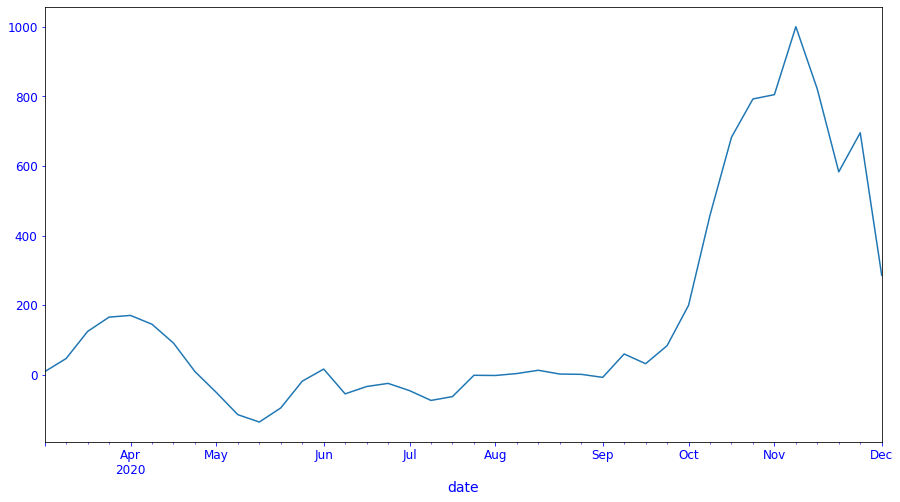

In [79]:
#Plotting the adjuste new_cases
ts_cases_adj.plot(figsize=(15, 8))
plt.show()


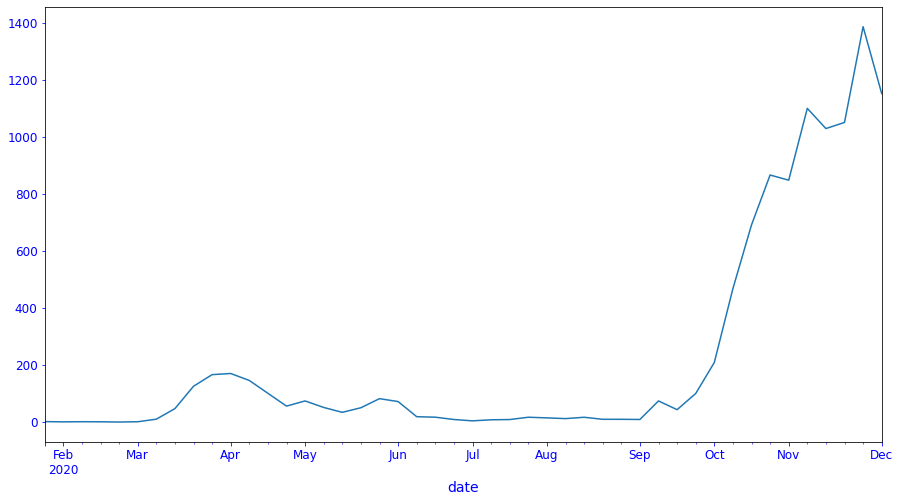

In [80]:
#The Adjusted New cases shows sudden drop in new_cases which is not true, rejecteing differencing
ts_cases_adj=cases_ts_weekly_avg
ts_cases_adj.plot(figsize=(15, 8))
plt.show()

In [81]:
import itertools
import statsmodels.api as sm
#The variables p,P,d,D,q,Q are defined as under
#p and seasonal P: indicate the number of AR terms (lags of the stationary series)
#d and seasonal D: indicate differencing that must be done to stationary series
#q and seasonal Q: indicate the number of MA terms (lags of the forecast errors)
#lag: indicates the seasonal length in the data
#setting prameters for SARIMA

p = range(0, 3)
d = range(1,2)
q = range(0, 4)

pdq = list(itertools.product(p, d, q))
print(pdq)
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal SARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
seasonal_pdq


[(0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 1, 3), (1, 1, 0), (1, 1, 1), (1, 1, 2), (1, 1, 3), (2, 1, 0), (2, 1, 1), (2, 1, 2), (2, 1, 3)]
Examples of parameter combinations for Seasonal SARIMA...
SARIMAX: (0, 1, 1) x (0, 1, 1, 12)
SARIMAX: (0, 1, 1) x (0, 1, 2, 12)
SARIMAX: (0, 1, 2) x (0, 1, 3, 12)


[(0, 1, 0, 12),
 (0, 1, 1, 12),
 (0, 1, 2, 12),
 (0, 1, 3, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12),
 (1, 1, 2, 12),
 (1, 1, 3, 12),
 (2, 1, 0, 12),
 (2, 1, 1, 12),
 (2, 1, 2, 12),
 (2, 1, 3, 12)]

In [109]:
#Performing a grid search with the list of possible values around our estimated parameters. We have to  pick the model with the least AIC.
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(ts_cases_adj,
                                            order=param,
                                            seasonal_order=param_seasonal,)
            results = mod.fit(method = 'powell')
            print('SARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue
#AIC (Akaike information criterion) is an estimator of the relative quality of statistical models for a given set of data

Optimization terminated successfully.
         Current function value: 4.447524
         Iterations: 2
         Function evaluations: 42
SARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:411.17224224197446
Optimization terminated successfully.
         Current function value: 4.447461
         Iterations: 2
         Function evaluations: 45
SARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:413.1664034249974
Optimization terminated successfully.
         Current function value: 4.443125
         Iterations: 2
         Function evaluations: 68
SARIMA(0, 1, 0)x(0, 1, 2, 12)12 - AIC:414.7674856392272
Optimization terminated successfully.
         Current function value: 4.443231
         Iterations: 3
         Function evaluations: 145
SARIMA(0, 1, 0)x(0, 1, 3, 12)12 - AIC:416.7772622578387
Optimization terminated successfully.
         Current function value: 4.447490
         Iterations: 2
         Function evaluations: 44
SARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:413.1690913907694
Optimization terminated successfu

In [83]:
#getting values which has minimum AIC for the time series data
#ARIMA(0, 1, 2)x(0, 1, 0, 12)12 - AIC:409.6382686540549

mod = sm.tsa.statespace.SARIMAX(ts_cases_adj,
                                            order=(0, 1, 2),
                                seasonal_order=(0, 1, 0, 12))
#Fitting model using POWELL method: Powell method, is an algorithm proposed  for finding a local minimum of a function
results = mod.fit(method = 'powell')
#Print the results
print(results.summary().tables[1])


Optimization terminated successfully.
         Current function value: 4.387372
         Iterations: 2
         Function evaluations: 72
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.1453      0.101     -1.441      0.150      -0.343       0.052
ma.L2          0.5750      0.140      4.119      0.000       0.301       0.849
sigma2      1.173e+04   2422.703      4.840      0.000    6977.213    1.65e+04


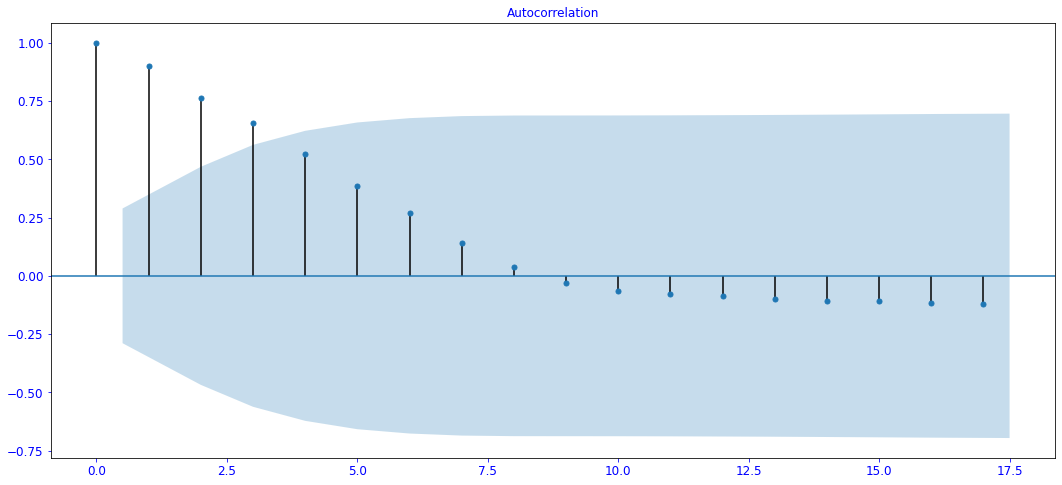

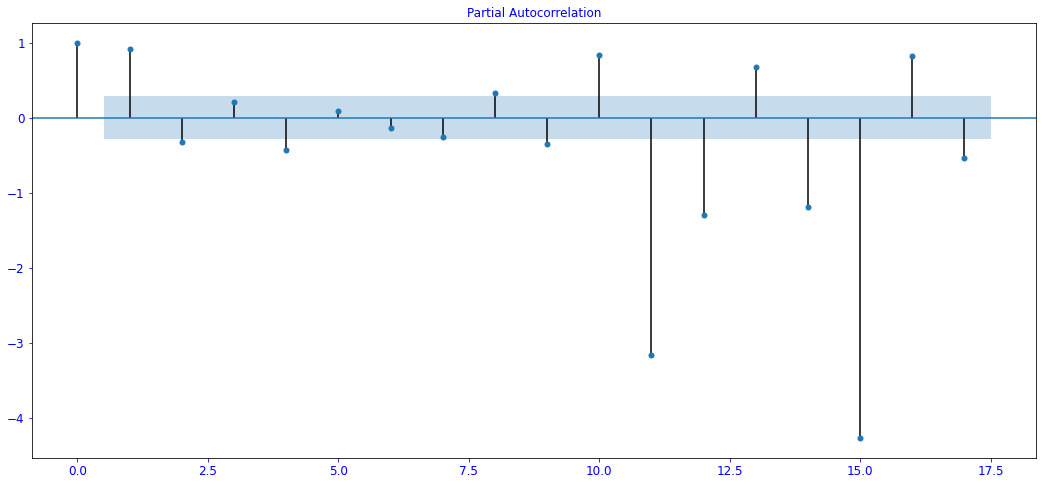

In [84]:
# Plotting the ACF and PACF Plot of the Trend and Seasonally adjusted Time Series data
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(ts_cases_adj)
mpl.pyplot.show()
plot_pacf(ts_cases_adj)
mpl.pyplot.show()

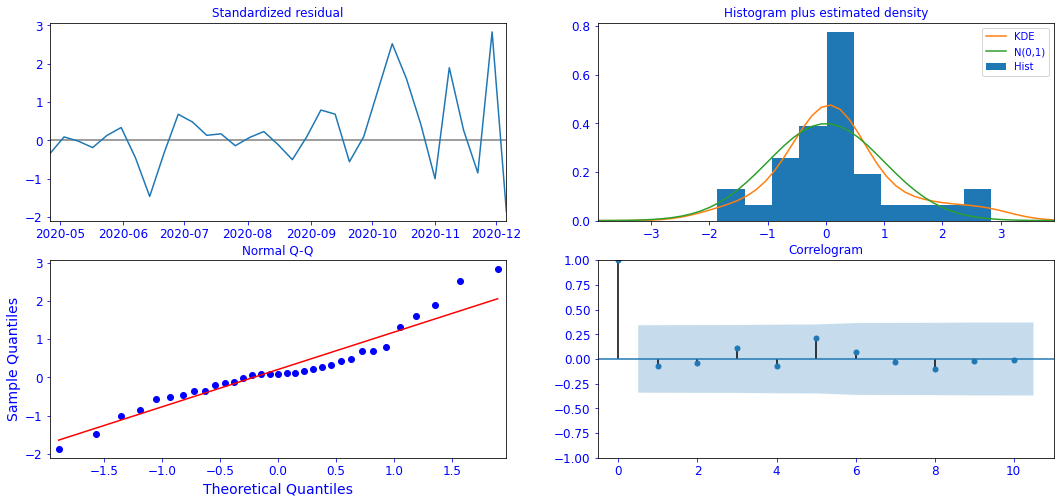

In [85]:
#Plotting Standard residual for the new_cases, HIstogram plot of the cases and Density plot, Normal Q-Q and corelogram
results.plot_diagnostics(figsize=(18, 8))
plt.show()

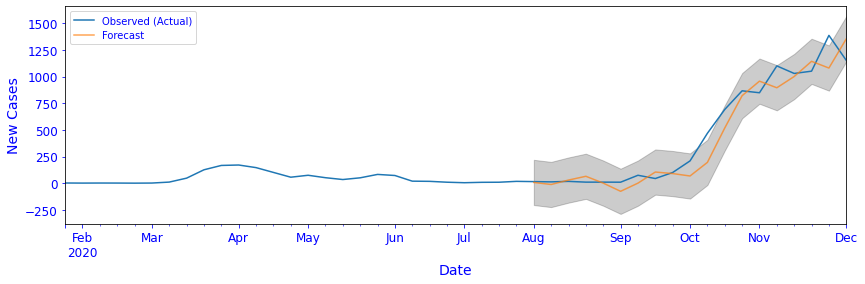

In [86]:
#Training the Model and testing against the actual data
pred = results.get_prediction(start=pd.to_datetime('2020-08-02'), dynamic=False)
#Valudate the Model versus the actual data
pred_ci = pred.conf_int()
ax = ts_cases_adj.plot(label='Observed (Actual)')
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=.7, figsize=(14, 4))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('New Cases')
plt.legend()
plt.show()

In [87]:
#Calculate the predicted results versus actual values
y_forecasted = pred.predicted_mean
y_truth = ts_cases_adj['2020-08-02':]
#Calculate Mean Squared Error
mse = ((y_forecasted - y_truth) ** 2).mean()
mse=round(mse, 2)
print('The Mean Squared Error is {}'.format(mse))
#Calculate Root Mean Squared Error
rmse=round(np.sqrt(mse), 2)
print('The Root Mean Squared Error is {}'.format(rmse))
#Calculate R-squared Error or Coefficient of Determination:The % variation of y on variation with x
from sklearn.metrics import r2_score 
r_squared=r2_score(y_truth, y_forecasted)
print('R-squared Error is {}'.format(r_squared))

#Since the R squared error is approximately 0.92 closer to 1 the model can predict the values of future cases with a narrow margin of error
#prediction model accuracy is 92.23% which is acceptable.

The Mean Squared Error is 18185.01
The Root Mean Squared Error is 134.85
R-squared Error is 0.9233381666117498


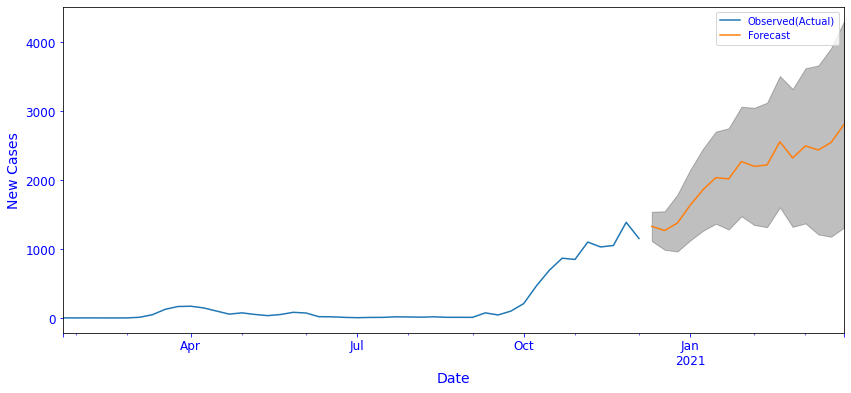

In [88]:
#Future Predict the results for next 13 weeks
pred_uc = results.get_forecast(steps=13)
pred_ci = pred_uc.conf_int()
ax = ts_cases_adj.plot(label='Observed(Actual)', figsize=(14, 6))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('New Cases')
plt.legend()




plt.show()
#Since we are preicting weekly average the value is calcualted on every Sunday . The gap in graph shows aperiod between 
#on a gap of a week 06-Dec-2020 to 13-Dec-2020 but there is NO missing values.

In [89]:
#viewing the predicted results
pred_ci

,lower new_cases,upper new_cases
2020-12-13,1115.368592,1539.837660
2020-12-20,988.867255,1547.244989
2020-12-27,964.582257,1789.244272
2021-01-03,1124.111500,2148.000743
2021-01-10,1264.516021,2454.739079
2021-01-17,1366.767287,2702.773527
2021-01-24,1282.939194,2750.315907
2021-01-31,1474.669717,3062.585383
2021-02-07,1347.806010,3047.734805
2021-02-14,1316.696949,3121.701008


In [90]:
list(pred_ci.columns.values)


['lower new_cases', 'upper new_cases']

In [91]:
#red_ci[['lower new_cases', 'upper new_cases']]
pred_ci['lower new_cases']

2020-12-13    1115.368592
2020-12-20     988.867255
2020-12-27     964.582257
2021-01-03    1124.111500
2021-01-10    1264.516021
2021-01-17    1366.767287
2021-01-24    1282.939194
2021-01-31    1474.669717
2021-02-07    1347.806010
2021-02-14    1316.696949
2021-02-21    1603.053849
2021-02-28    1321.230957
2021-03-07    1371.131864
2021-03-14    1211.524586
2021-03-21    1178.259221
2021-03-28    1308.726534
Freq: W-SUN, Name: lower new_cases, dtype: float64

In [92]:
pred_ci.filter('')
df_result=pred_ci[(pred_ci['lower new_cases'] <=100.0) | (pred_ci['upper new_cases'] <=100.0)]
df_result


,lower new_cases,upper new_cases


In [93]:
#check average for 2 consecutive weeks and say if Malaysia could achieve Objective of 100 cases/day in next three months
biweekly_day_average_meet=False
for index, row in pred_ci.iterrows():
    if ((pred_ci.loc[index,'lower new_cases']+pred_ci.loc[index,'upper new_cases'])/2) <=100:
        if ((pred_ci.loc[(index-1),'lower new_cases']+pred_ci.loc[(index-1),'upper new_cases'])/2) <=100:
            biweekly_day_average_meet=True
            print("Malaysia could achieve 14 days average of below 100 cases per day within the next 3 months for weeks ",pred_ci.loc[index],pred_ci.loc[(index - 1)])
if(biweekly_day_average_meet==False):
    print("Based on current trend of data it seems difficult that Malaysia would achieve trend on 100 cases per day in next three months")

Based on current trend of data it seems difficult that Malaysia would achieve trend on 100 cases per week in next three months


### There is not even a single week where average is less than 100 cases /day
### Based on current trend of data it seems difficult that Malaysia would achieve trend on 100 cases per day in next three months


# Time series analysis for COVID19 Test Kit prediction

In [94]:
#Filterout columns 'date','new_tests'
df_new_test=df[['date','new_tests']]
df_new_test

,date,new_tests
32620,2020-01-23,0.0
32621,2020-01-24,0.0
32622,2020-01-25,0.0
32623,2020-01-26,0.0
32624,2020-01-27,0.0
...,...,...
32931,2020-11-29,15370.0
32932,2020-11-30,17388.0
32933,2020-12-01,18696.0
32934,2020-12-02,20755.0


In [95]:
#set index the data frame by ‘Date 
df_new_test=df_new_test.set_index('date')
df_new_test

,new_tests
date,
2020-01-23,0.0
2020-01-24,0.0
2020-01-25,0.0
2020-01-26,0.0
2020-01-27,0.0
...,...
2020-11-29,15370.0
2020-11-30,17388.0
2020-12-01,18696.0


In [96]:
#aggregate the data from daily to Weekly in order to carry out the analysis
tests_ts_weekly_avg = df_new_test['new_tests'].resample('W').mean()
#W : weekly frequency
#M : month end frequency
#SM : semi-month end frequency (15th and end of month)
#Q : quarter end frequency
tests_ts_weekly_avg

date
2020-01-26        0.000000
2020-02-02        0.000000
2020-02-09        0.000000
2020-02-16       93.714286
2020-02-23       53.142857
2020-03-01       88.571429
2020-03-08       47.857143
2020-03-15      416.571429
2020-03-22      910.857143
2020-03-29     2722.714286
2020-04-05     1886.428571
2020-04-12     4850.285714
2020-04-19    16226.285714
2020-04-26     3942.714286
2020-05-03     9191.714286
2020-05-10    44198.142857
2020-05-17    26618.000000
2020-05-24     9202.714286
2020-05-31     6500.142857
2020-06-07     7666.285714
2020-06-14     6356.714286
2020-06-21     4660.571429
2020-06-28     9426.000000
2020-07-05     7795.428571
2020-07-12     6141.714286
2020-07-19     6033.428571
2020-07-26     6843.000000
2020-08-02     5933.285714
2020-08-09     9542.571429
2020-08-16     9752.857143
2020-08-23     8881.428571
2020-08-30     9589.142857
2020-09-06     9130.571429
2020-09-13     9242.857143
2020-09-20    10361.714286
2020-09-27     9386.285714
2020-10-04    14950.142

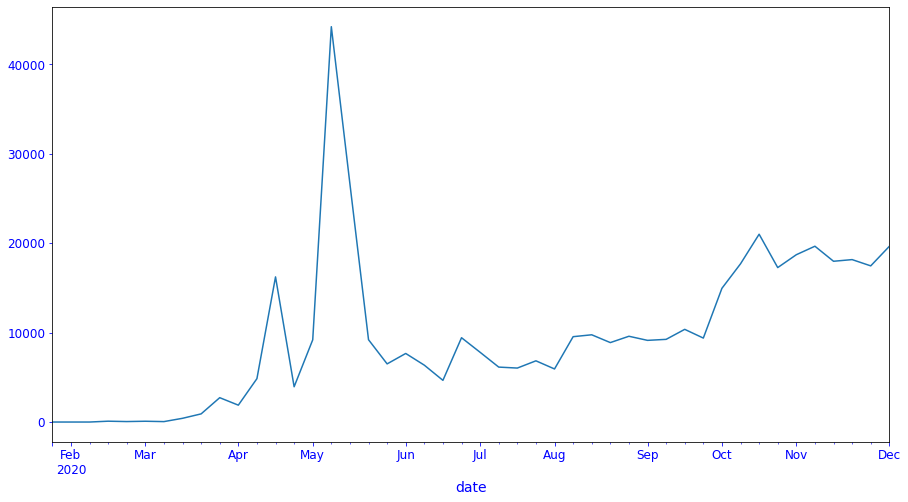

In [97]:
#Plotting the series
import matplotlib.pyplot as plt
#plt.style.use('fivethirtyeight')

tests_ts_weekly_avg.plot(figsize=(15, 8))
plt.show()

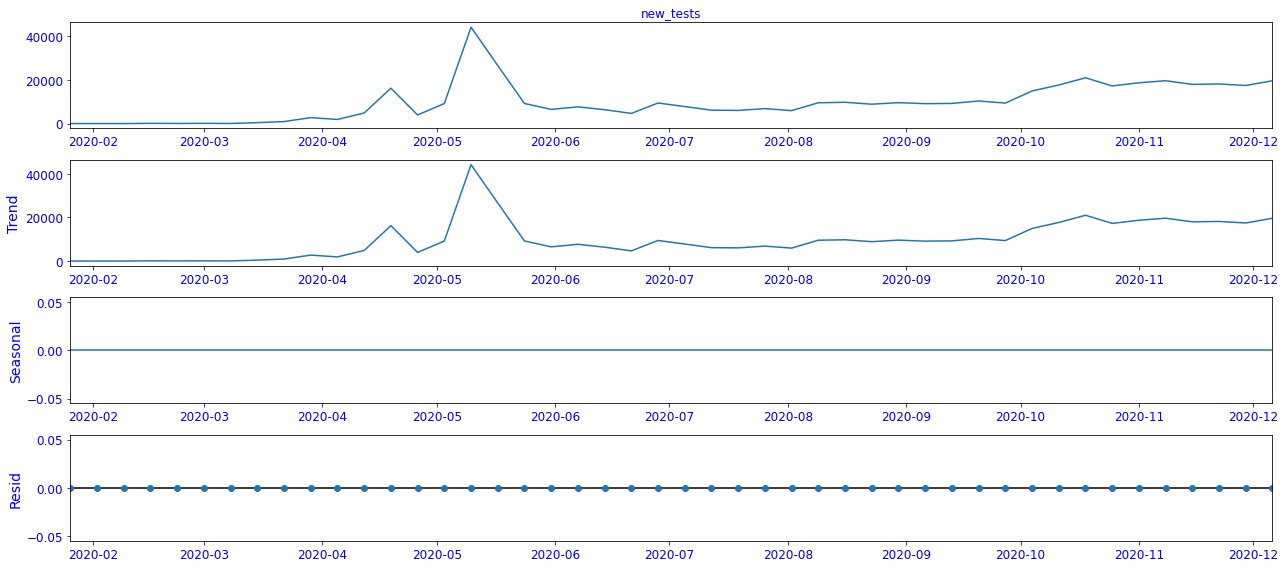

In [98]:
#decomposed time series to get components Trend, Seasonality &  Noise
from pylab import rcParams
import statsmodels.api as sm

rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(tests_ts_weekly_avg, model='additive', extrapolate_trend='freq', period=1)
fig = decomposition.plot()
plt.show()

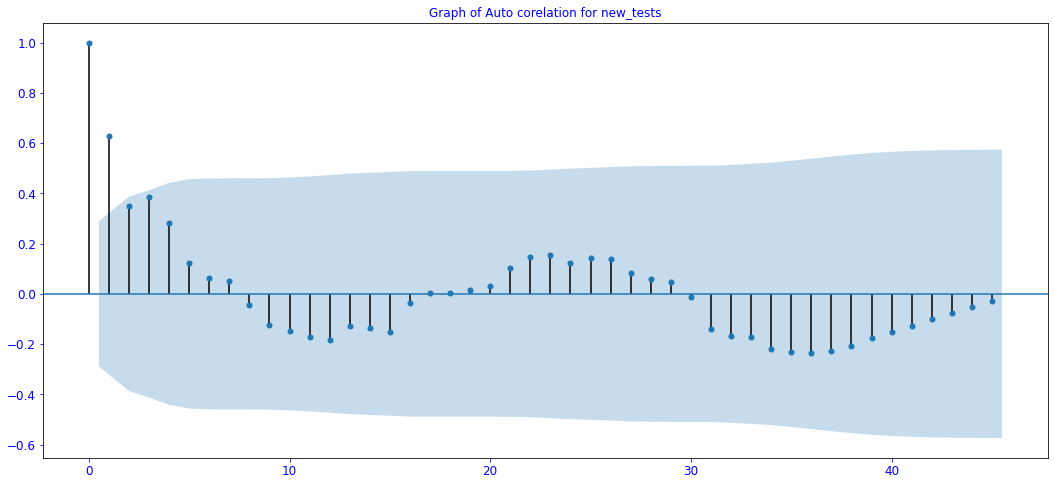

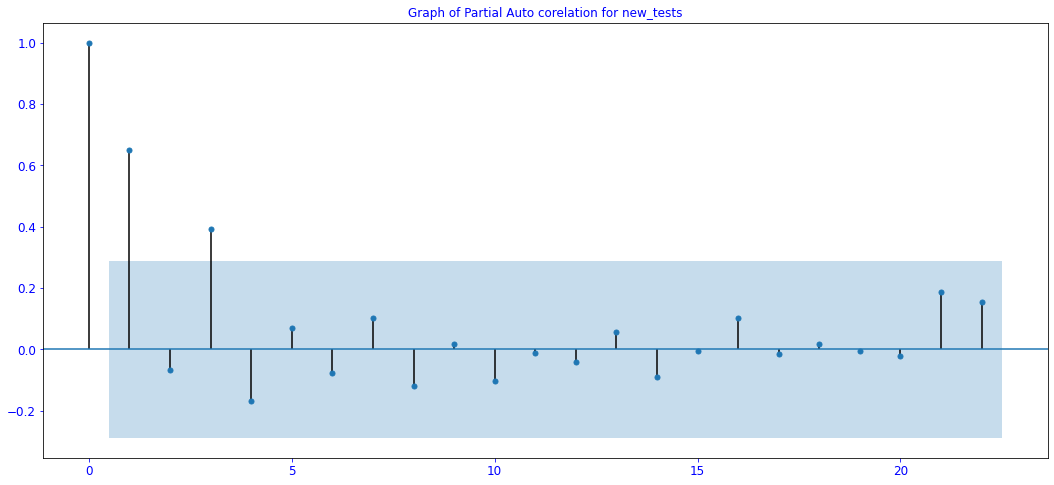

In [100]:
# Plotting the Auto Correlation Function(ACF) and Partial Auto Correlation Function(PACF) Plot of the Trend and Seasonally adjusted Time Series data
#to determine  p and seasonal P, q and seasonal Q
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#Plot the autocorrelation function

plot_acf(tests_ts_weekly_avg,use_vlines=True,title='Graph of Auto corelation for new_tests', lags=45)
mpl.pyplot.show()
#The trendwas initially decreasing in initial few weeks and then it started increasing . The change in trend results in change in corelation.
#ACF plot Spikes at lag =1 means a probable Autoregressive(AR)  order of 1 and seasonal AR order of 1

#Plots lags on the horizontal and the partial correlations on vertical axis for time-series data using method='ols'.
plot_pacf(tests_ts_weekly_avg,use_vlines=True,method='ols' ,title='Graph of Partial Auto corelation for new_tests', lags=22)
mpl.pyplot.show()
#PACF plot spikes at lag=1 and lag=4 and then spikes at lag=21, which means a probable Moving Average(MA) order of 1 or 2 and seasonal MA order of 1 


In [101]:
#apply adf test and kpss test on the series to check whether series is stationery
print(print_adf_result(tests_ts_weekly_avg))
print(print_kpss_result(tests_ts_weekly_avg))
#ADF: if the p-value is less than the critical value , the series is stationary
#P valie is 0.08 whihc is not less than critical value of 0.05 so statistically we can confirm that the series is not stationary.
#Hence, we would do first-order differencing for the trend and re-run the ADF test to check for stationarity.

Results of Dickey-Fuller Test:
Test Statistic                 -1.771391
p-value                         0.394755
#Lags Used                      2.000000
Number of Observations Used    43.000000
Critical Value (1%)            -3.592504
Critical Value (5%)            -2.931550
Critical Value (10%)           -2.604066
dtype: float64
None
Results of KPSS Test is as under:
Test Statistic            0.391765
p-value                   0.080705
Lags Used                10.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
None


In [102]:
#Doing First Order differencing
ts_tests_adj = tests_ts_weekly_avg - tests_ts_weekly_avg.shift(1)
#ts_cases_adj =cases_ts_weekly_avg
ts_tests_adj = ts_tests_adj.dropna()
#ts_cases_adj.plot()
print(print_adf_result(ts_tests_adj))
print(print_kpss_result(ts_tests_adj))
#For first oder differencing p =6.271783e-13  less than 0.05 so ploting the graph



Results of Dickey-Fuller Test:
Test Statistic                -8.225249e+00
p-value                        6.271783e-13
#Lags Used                     1.000000e+00
Number of Observations Used    4.300000e+01
Critical Value (1%)           -3.592504e+00
Critical Value (5%)           -2.931550e+00
Critical Value (10%)          -2.604066e+00
dtype: float64
None
Results of KPSS Test is as under:
Test Statistic            0.10516
p-value                   0.10000
Lags Used                10.00000
Critical Value (10%)      0.34700
Critical Value (5%)       0.46300
Critical Value (2.5%)     0.57400
Critical Value (1%)       0.73900
dtype: float64
None


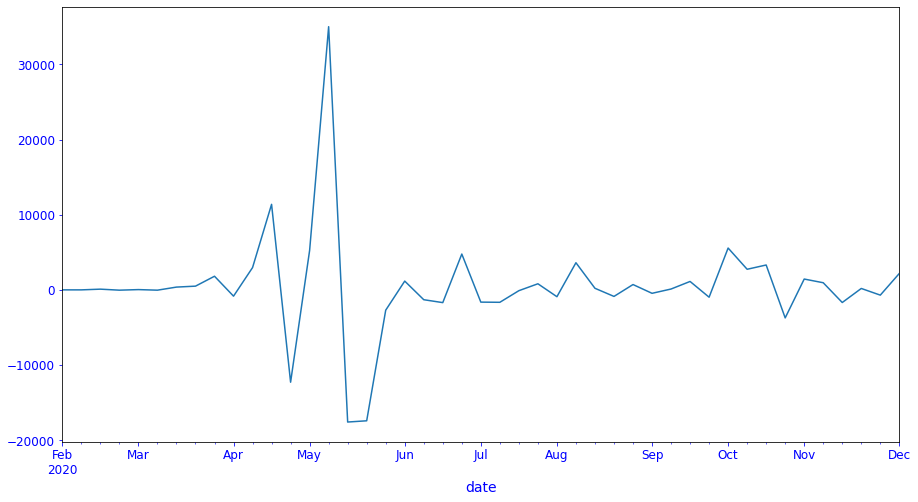

In [103]:
#Plotting the series with ts_tests_adj

ts_tests_adj.plot(figsize=(15, 8))
plt.show()
#the differencing gives a non zero value for second half of May 2020 so rejecting the differentiating


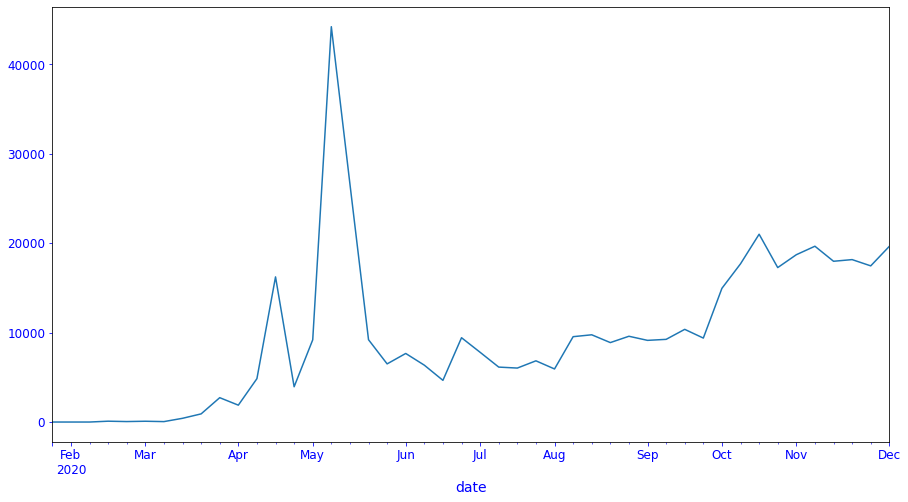

In [104]:
#Plotting the series with ts_tests_adj
ts_tests_adj=tests_ts_weekly_avg
ts_tests_adj.plot(figsize=(15, 8))
plt.show()

In [105]:
import itertools
import statsmodels.api as sm
#The variables p,P,d,D,q,Q are defined as under
#p and seasonal P: indicate the number of AR terms (lags of the stationary series)
#d and seasonal D: indicate differencing that must be done to stationary series
#q and seasonal Q: indicate the number of MA terms (lags of the forecast errors)
#lag: indicates the seasonal length in the data
#setting prameters for SARIMA

p = range(0, 3)
d = range(1,2)
q = range(0, 4)

pdq = list(itertools.product(p, d, q))
print(pdq)
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal SARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
seasonal_pdq


[(0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 1, 3), (1, 1, 0), (1, 1, 1), (1, 1, 2), (1, 1, 3), (2, 1, 0), (2, 1, 1), (2, 1, 2), (2, 1, 3)]
Examples of parameter combinations for Seasonal SARIMA...
SARIMAX: (0, 1, 1) x (0, 1, 1, 12)
SARIMAX: (0, 1, 1) x (0, 1, 2, 12)
SARIMAX: (0, 1, 2) x (0, 1, 3, 12)


[(0, 1, 0, 12),
 (0, 1, 1, 12),
 (0, 1, 2, 12),
 (0, 1, 3, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12),
 (1, 1, 2, 12),
 (1, 1, 3, 12),
 (2, 1, 0, 12),
 (2, 1, 1, 12),
 (2, 1, 2, 12),
 (2, 1, 3, 12)]

In [106]:
#Performing a grid search with the list of possible values around our estimated parameters. We have to  pick the model with the least AIC.
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(ts_tests_adj,
                                            order=param,
                                            seasonal_order=param_seasonal,)
            results = mod.fit(method = 'powell')
            print('SARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue
#AIC (Akaike information criterion) is an estimator of the relative quality of statistical models for a given set of data

Optimization terminated successfully.
         Current function value: 7.742832
         Iterations: 2
         Function evaluations: 35
SARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:714.3405424334622
Optimization terminated successfully.
         Current function value: 7.526263
         Iterations: 3
         Function evaluations: 83
SARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:696.4161590733142
Optimization terminated successfully.
         Current function value: 7.453077
         Iterations: 4
         Function evaluations: 161
SARIMA(0, 1, 0)x(0, 1, 2, 12)12 - AIC:691.683097088772
Optimization terminated successfully.
         Current function value: 7.449697
         Iterations: 4
         Function evaluations: 202
SARIMA(0, 1, 0)x(0, 1, 3, 12)12 - AIC:693.3721635797175
Optimization terminated successfully.
         Current function value: 7.638214
         Iterations: 2
         Function evaluations: 59
SARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:706.7156720997904
Optimization terminated successful

In [112]:
#getting values which has minimum AIC for the time series data
#SARIMA(0, 1, 0)x(2, 1, 0, 12)12 - AIC:645.4777029543509


mod = sm.tsa.statespace.SARIMAX(ts_tests_adj,
                                            order=(0, 1, 2),
                                seasonal_order=(2, 1, 0, 12))
#Fitting model using POWELL method: Powell method, is an algorithm proposed  for finding a local minimum of a function
results = mod.fit(method = 'powell')
#Print the results
print(results.summary().tables[1])



Optimization terminated successfully.
         Current function value: 6.938933
         Iterations: 7
         Function evaluations: 443
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.1051      0.158     -0.665      0.506      -0.415       0.205
ma.L2         -0.1909      0.169     -1.132      0.258      -0.522       0.140
ar.S.L12      -0.9920      0.031    -32.350      0.000      -1.052      -0.932
ar.S.L24      -0.9878      0.004   -239.722      0.000      -0.996      -0.980
sigma2      3.872e+06   8.07e-09    4.8e+14      0.000    3.87e+06    3.87e+06


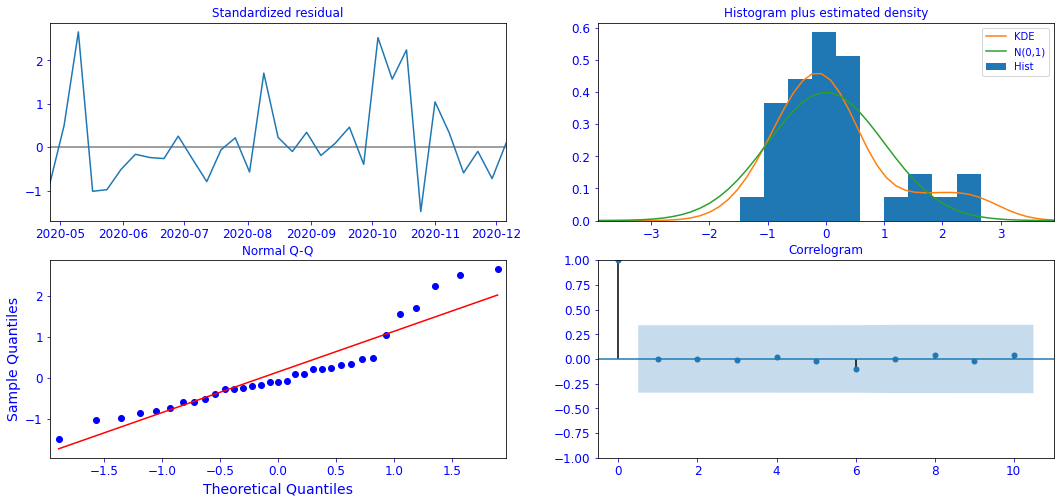

In [113]:
#Plotting Standard residual for the new_cases, HIstogram plot of the cases and Density plot, Normal Q-Q and corelogram
results.plot_diagnostics(figsize=(18, 8))
plt.show()

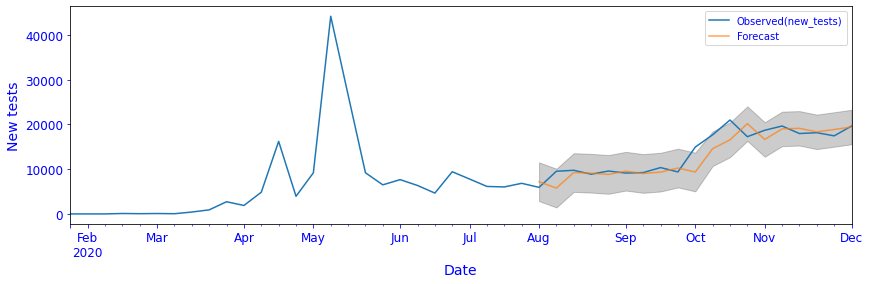

In [114]:
#Valudate the Model versus the actual data

pred = results.get_prediction(start=pd.to_datetime('2020-08-02'), dynamic=False)
pred_ci = pred.conf_int()
ax = ts_tests_adj.plot(label='Observed(new_tests)')
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=.7, figsize=(14, 4))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('New tests')
plt.legend()
plt.show()

In [115]:
#Calculate the predicted results versus actual values
y_forecasted = pred.predicted_mean
y_truth = ts_tests_adj['2020-08-02':]
#Calculate Mean Squared Error
mse = ((y_forecasted - y_truth) ** 2).mean()
mse=round(mse, 2)
print('The Mean Squared Error is {}'.format(mse))
#Calculate Root Mean Squared Error
rmse=round(np.sqrt(mse), 2)
print('The Root Mean Squared Error is {}'.format(rmse))
#Calculate R-squared Error or Coefficient of Determination:The % variation of y on variation with x
from sklearn.metrics import r2_score 
r_squared=r2_score(y_truth, y_forecasted)
print('R-squared Error is {}'.format(r_squared))

#Since the R squared error is approximately 0.78 closer to 1 the model can predict the values of future cases with a narrow margin of error
#prediction model accuracy is 77.98% which is acceptable.

The Mean Squared Error is 5035568.2
The Root Mean Squared Error is 2244.01
R-squared Error is 0.7797946843205159


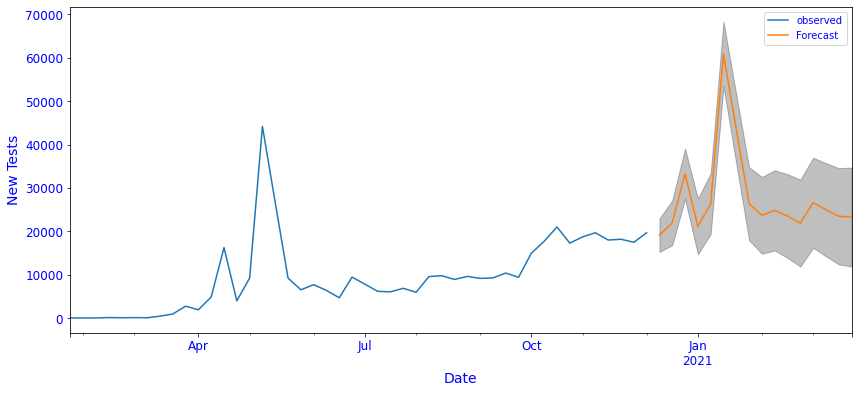

In [116]:
#Future Predict the results of new Tests for next 13 weeks

pred_uc = results.get_forecast(steps=13)
pred_ci = pred_uc.conf_int()
ax = ts_tests_adj.plot(label='observed', figsize=(14, 6))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('New Tests')
plt.legend()
plt.show()
#Since we are preicting weekly average the value is calcualted on every Sunday . The gap in graph shows aperiod between 
#on a gap of a week 06-Dec-2020 to 13-Dec-2020 but there is NO missing values.

In [123]:
#Use mean of Max and minimum values to calculate number of kits required for next 16 weeks
pred_ci['kits_required']=pred_ci.mean(axis=1)
pred_ci
kits_required=pred_ci['kits_required']*7
kits_required

2020-12-13    133655.966896
2020-12-20    153760.421159
2020-12-27    232683.847400
2021-01-03    147897.283550
2021-01-10    184401.026155
2021-01-17    426222.747556
2021-01-24    304848.991595
2021-01-31    184487.652475
2021-02-07    165680.673329
2021-02-14    173775.405410
2021-02-21    164667.502430
2021-02-28    153064.665024
2021-03-07    186018.198691
2021-03-14    174875.246806
2021-03-21    164234.615847
2021-03-28    162889.254996
Freq: W-SUN, Name: kits_required, dtype: float64

## Kits required for next 12 weeks

## Kits required for next 3 months are as under

In [124]:
import math
cumulative_sum=0
sum=kits_required[0:3].sum()
cumulative_sum+=sum
print('Number of kits required for next month is {} '.format(math.ceil(sum)))
sum=kits_required[4:7].sum()
cumulative_sum+=sum
print('Number of kits required for second month is {} '.format(math.ceil(sum)))
sum=kits_required[8:11].sum()
cumulative_sum+=sum
print('Number of kits required for third month is {} '.format(math.ceil(sum)))

print('Cumulative test cases for next three months is {}'.format(math.ceil(cumulative_sum)))

Number of kits required for next month is 520101 
Number of kits required for second month is 915473 
Number of kits required for third month is 504124 
Cumulative test cases for next three months is 1939697
